<a href="https://colab.research.google.com/github/julio7173/Proyectos-Personales/blob/Modulo_3/AluraLatam_Aula_1_Inmersion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AULA 1**

**IMPORTAMOS/MONTAMOS NUESTRO DRIVE EN GOOGLE COLAB**

In [20]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**AHORA IMPORTAMOS LA LIBRERIA PANDAS**

In [21]:
import pandas as pd
inmuebles = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/inmuebles_bogota.csv")

**PRIMER DESAFIO**

Promedio de área de todos los inmuebles en los barrios en el dataset, junto a una grafica de barras del top 10.

In [4]:
columnas = {"Baños" : "Banos", "Área" : "Area"}
inmuebles = inmuebles.rename(columns = columnas)

In [5]:
inmuebles.Area.mean()

146.66470588235293

47    260
60    174
48    172
54    168
70    151
50    143
51    142
59    133
53    133
63    132
Name: Area, dtype: int64

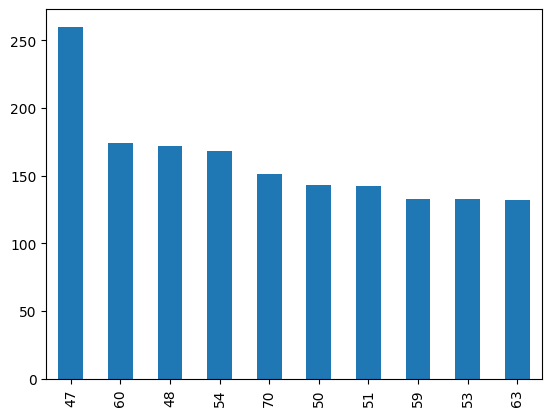

In [6]:
inmuebles.Area.value_counts().head(10).plot.bar()
inmuebles.Area.value_counts().head(10)

**SEGUNDO DESAFIO**

Consultar otros datos estadisticos, como; conteo, mediana, valores minimos y valores maximos.

En estadística, el **CONTEO** se refiere al número total de elementos en un conjunto de datos. La **MEDIANA** es el valor que se encuentra en el medio de un conjunto de datos ordenados. Es decir, la mitad de los valores es menor que o igual a la mediana y la otra mitad de los valores es mayor que o igual a la mediana1. Los valores **MINIMOS** y **MAXIMOS** son, respectivamente, el valor más pequeño y el valor más grande en un conjunto de datos.

In [7]:
inmuebles.describe()

,Habitaciones,Banos,Area
count,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706
std,2.049856,1.255314,1731.379622
min,1.000000,0.000000,2.000000
25%,2.000000,2.000000,57.000000
50%,3.000000,2.000000,80.000000
75%,3.000000,3.000000,135.000000
max,110.000000,9.000000,166243.000000


# **AULA 2**

**PRIMER DESAFIO**

Estudiar mejor el **histograma de valores**, seleccionar **3 tipos de inmuebles** (*Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información*);



In [8]:
valor = inmuebles.Valor.str.split(expand = True)
inmuebles ["Moneda"] = valor [0]
inmuebles ["Precio"] = valor [1]

In [9]:
inmuebles ["Precio"] = inmuebles ["Precio"].str.replace(".","",regex = True)

In [10]:
inmuebles ["Precio_Millon"] = inmuebles.Precio.astype("float")/1000000

In [11]:
pd.set_option('display.precision',2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


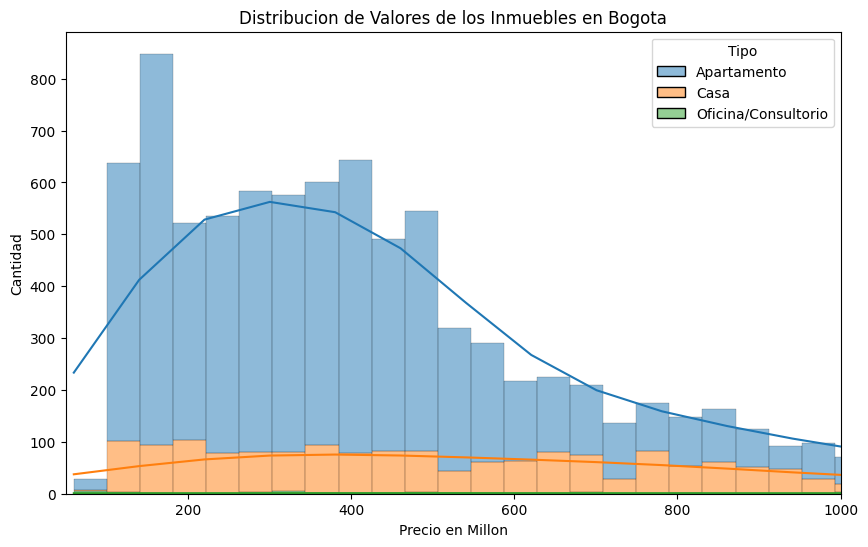

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data = inmuebles, x = "Precio_Millon", kde = True, hue_order =["Apartamento","Casa","Oficina/Consultorio"] , hue = "Tipo", multiple = "stack")
plt.title("Distribucion de Valores de los Inmuebles en Bogota")
plt.xlabel("Precio en Millon")
plt.ylabel("Cantidad")
plt.xlim((50,1000))
plt.savefig("/content/drive/MyDrive/Colab Notebooks/grafica_de_distribucion_de_frecuencias.png",format='png')
plt.show()

**SEGUNDO DESAFIO**

Precio del metro cuadrado por barrio, graficar el resultado segun la informacion sea visble

In [13]:
precio_m2 = inmuebles.Area / inmuebles.Precio_Millon
inmuebles ["Precio_m_2"] = precio_m2

In [14]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
 11  Precio_m_2     9520 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 892.6+ KB


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(100,100))
sns.barplot(x="Precio_m_2", y="Barrio", data=inmuebles, ax = ax)
plt.title("Precio por Metro Cuadrado en los Barrios de Bogota")
plt.xlabel("Precio por metro cuadrado")
plt.ylabel("Barrios")
plt.savefig("/content/drive/MyDrive/Colab Notebooks/precio_por_m2.png",format='png')
plt.show()

# **AULA 3**

In [26]:
datos_a = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Identificación (Capítulo A).csv", sep = ";", encoding = "latin-1")
datos_a.head()

,DIRECTORIO,DPTO,MPIO,CLASE,COD_LOCALIDAD,NOMBRE_LOCALIDAD,COD_UPZ_GRUPO,NOMBRE_UPZ_GRUPO,ESTRATO2021,NOMBRE_ESTRATO,FEX_C
0,3004346.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"13,2266692027239"
1,3004347.00,11,11001,1,14.00,Los Mártires,37.00,Santa Isabel,11001162,Santa Isabel,"17,8555889419101"
2,3004348.00,11,11001,1,3.00,Santa Fe,814.00,SANTA FE: Las Nieves + Sagrado Corazón,11001187,SANTA FE: Las Nieves + Sagrado Corazón,"10,0286103658331"
3,3004349.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"28,6502122142802"
4,3004350.00,11,11001,1,1.00,Usaquén,803.00,USAQUÉN: Country Club + Santa Bárbara,11001176,USAQUÉN: Country Club + Santa Bárbara,"24,4684068319009"


In [23]:
datos_a = datos_a.loc[datos_a.MPIO == 11001]
datos_a.shape

(86504, 11)

In [27]:
datos_b = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datos de la vivenda y su entorno (Capítulo B).csv", sep = ";", encoding = "latin-1")
datos_c = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Condiciones habitacionales del hogar (Capítulo C).csv", sep = ";", encoding = "latin-1")
datos_e = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Composición del hogar y demografía (Capítulo E).csv", sep = ";", encoding = "latin-1")
datos_h = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Educación (Capitulo H).csv", sep = ";", encoding = "latin-1")
datos_l = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Percepción sobre las condiciones de vida y el desempeño institucional (Capítulo L).csv", sep = ";", encoding = "latin-1")
datos_k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fuerza de trabajo (Capítulo K).csv", sep = ";", encoding = "latin-1") 

<ipython-input-27-1726f0c31015>:2: DtypeWarning: Columns (4,25,30,47) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_c = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Condiciones habitacionales del hogar (Capítulo C).csv", sep = ";", encoding = "latin-1")
<ipython-input-27-1726f0c31015>:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_e = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Composición del hogar y demografía (Capítulo E).csv", sep = ";", encoding = "latin-1")
<ipython-input-27-1726f0c31015>:4: DtypeWarning: Columns (26,81) have mixed types. Specify dtype option on import or set low_memory=False.
  datos_h = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Educación (Capitulo H).csv", sep = ";", encoding = "latin-1")
<ipython-input-27-1726f0c31015>:5: DtypeWarning: Columns (114,117,122,126,164,166,168) have mixed types. Specify dtype option on import or set low

In [30]:
datos_dane = pd.merge(datos_a, datos_b, on = "DIRECTORIO", how = "left")
datos_dane.shape

(106467, 73)

In [31]:
datos_dane = pd.merge(datos_dane, datos_c, on = "DIRECTORIO", how = "left")
datos_dane.shape

(107119, 214)

In [32]:
datos_dane = pd.merge(datos_dane, datos_e, on = "DIRECTORIO", how = "left")
datos_dane.shape

<ipython-input-32-71bf9830983e>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'FEX_C_x'} in the result is deprecated and will raise a MergeError in a future version.
  datos_dane = pd.merge(datos_dane, datos_e, on = "DIRECTORIO", how = "left")


(296303, 281)

In [33]:
datos_dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296303 entries, 0 to 296302
Columns: 281 entries, DIRECTORIO to FEX_C_y
dtypes: float64(140), int64(126), object(15)
memory usage: 637.5+ MB


**PRIMER DESAFIO**

Dar un vistazo a la base de datos del DANE, comprender conceptualmente estas variables para entender mejor el contexto de esta base de datos.

**SEGUNDO DESAFIO**

Organizar tu notebook para que tu proyecto quede mejor presentado.

# **AULA 4**